### KDE plot example:

In [81]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import os
import pylab
import matplotlib.pyplot as plt

#sql stuff:
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
import psycopg2


%config InlineBackend.figure_format = 'retina'

In [82]:
dbname = 'airbnb_db'
username = 'alexpapiu'

con = psycopg2.connect(database = dbname, user = username)

In [100]:
nbd = "East Village"

#Private Room or Entire home/apt
#room_type = "Entire home/apt"
room_type = "Private room"

In [101]:
train = pd.read_sql_query("""
                          SELECT * FROM small_listings 
                          WHERE neighbourhood_cleansed = %(nbd)s AND
                          room_type = %(room_type)s;
                          """,
                          con, index_col = "id",
                          params = {"nbd":nbd, "room_type":room_type})

median_price = train["price"].mean()

In [102]:
"95% of the listings are in between ${0} and ${1}".format(train["price"].quantile(0.05),train["price"].quantile(0.96))

'95% of the listings are in between $60.0 and $200.0'

//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


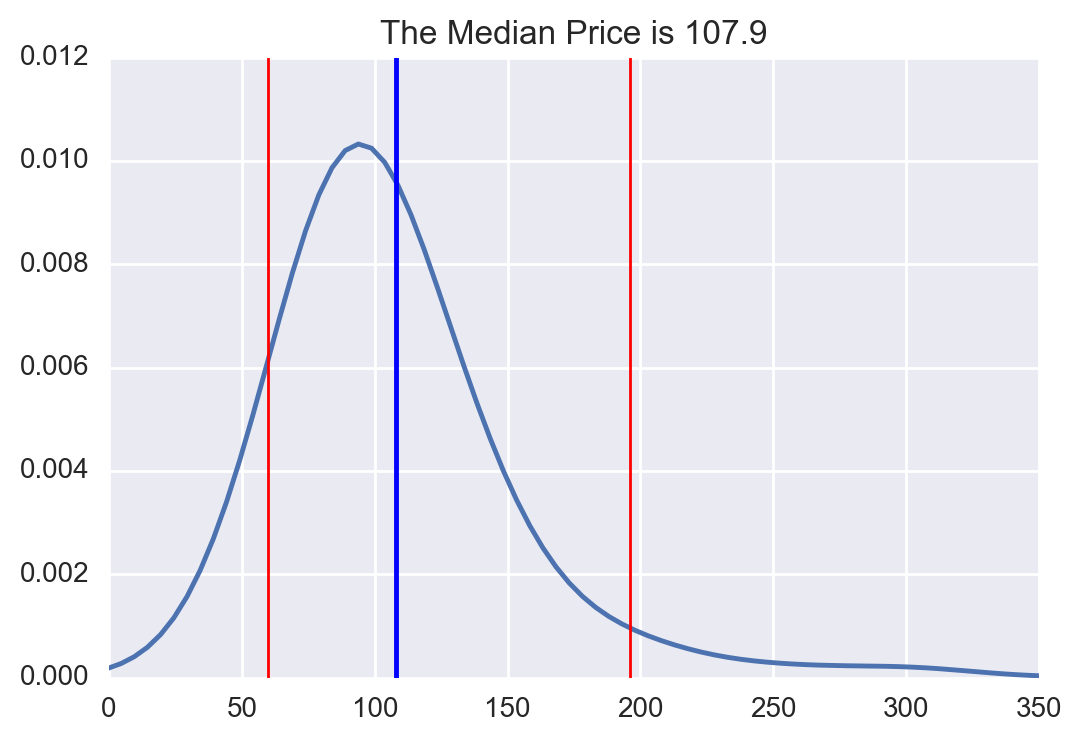

In [103]:
sns.kdeplot(train["price"].values, bw=25.0)
plt.axvline(x=median_price)
plt.axvline(train["price"].quantile(0.05), color = "red", linewidth = 1)
plt.axvline(train["price"].quantile(0.95), color = "red", linewidth = 1)

#plt.text(median_price + 50,0.01,'The Median Price is {0}'.format(np.round(median_price, 1)), fontsize=12)
plt.title('The Median Price is {0}'.format(np.round(median_price, 1)))


if room_type == "Entire home/apt":
    plt.xlim([0, 500])
else:
    plt.xlim([0, 350])